<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

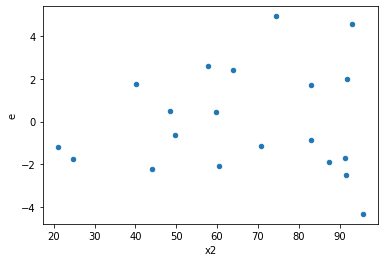

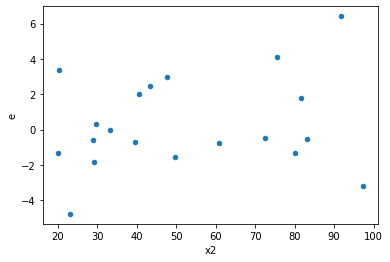

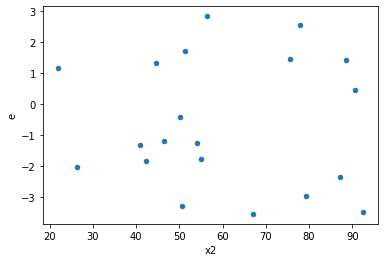

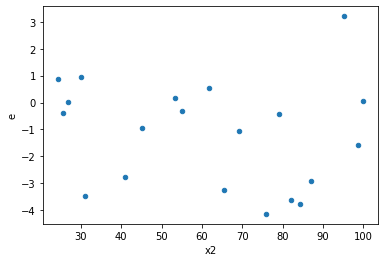

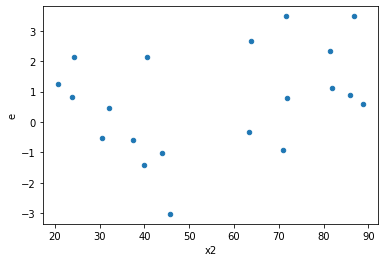

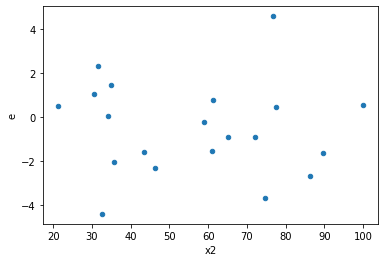

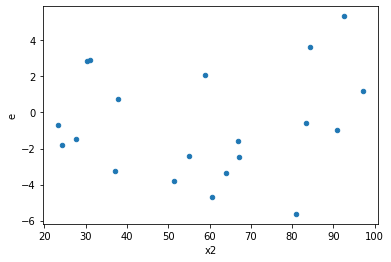

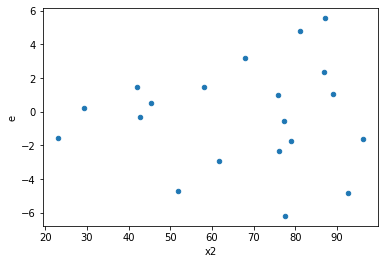

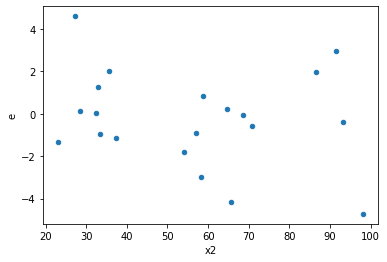

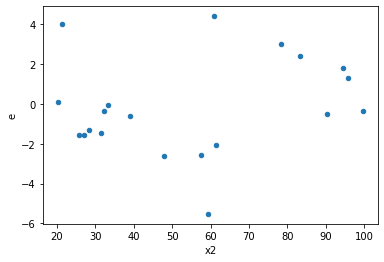

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,5.0,29.49673482871532,36.75481504498416,2.681521348065029,7.350963008996833,2.7413404761074336,0.27547216347105397,0.862263918264473,0.13773608173552698,Reject005=1 : Homoscedasticity
2.0,11.0,5.0,26.866143135103908,65.50458217622429,2.44237664864581,13.100916435244859,5.364003313128931,0.0765233819020601,0.96173830904897,0.03826169095103005,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,39.412664835384,75.16640161906153,4.926583104423,9.395800202382691,1.907163647345623,0.38007569424283094,0.8099621528785845,0.19003784712141547,Reject005=1 : Homoscedasticity
6.0,9.0,7.0,20.121046890727836,67.63305203260447,2.235671876747537,9.661864576086353,4.321682746281384,0.06663466474635915,0.9666826676268204,0.033317332373179576,Reject005=1 : Homoscedasticity
10.0,5.0,11.0,13.282226516965352,56.21362012498409,2.6564453033930704,5.1103291022712805,1.923747157806664,0.3398519961819255,0.8300740019090372,0.16992599809096276,Reject005=1 : Homoscedasticity
11.0,9.0,7.0,49.70948831402855,68.95347026815075,5.523276479336506,9.850495752592964,1.7834515055411955,0.4578305241946774,0.7710847379026613,0.2289152620973387,Reject005=1 : Homoscedasticity
13.0,10.0,6.0,25.36750095162495,27.539897385484345,2.5367500951624953,4.589982897580724,1.809394983894425,0.48313960212865115,0.7584301989356744,0.24156980106432557,Reject005=1 : Homoscedasticity
14.0,2.0,14.0,3.491761477306254,21.183100914435176,1.745880738653127,1.5130786367453697,0.8666563547248054,0.8834562002584254,0.5582718998707873,0.4417281001292127,Reject005=1 : Homoscedasticity
15.0,9.0,7.0,25.175068136176076,24.894935140162975,2.797229792908453,3.5564193057375677,1.2714076314909182,0.7684594743175637,0.6157702628412182,0.38422973715878184,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,5.0,29.49673482871532,36.75481504498416,2.681521348065029,7.350963008996833,2.7413404761074336,0.27547216347105397,Reject005=1 : Homoscedasticity
1.0,12.0,4.0,60.791340124536774,5.565938783696211,5.065945010378065,1.3914846959240528,0.27467425980216237,0.07292620318082985,Reject005=1 : Homoscedasticity
2.0,11.0,5.0,26.866143135103908,65.50458217622429,2.44237664864581,13.100916435244859,5.364003313128931,0.0765233819020601,Reject005=1 : Homoscedasticity
3.0,10.0,6.0,26.203493165722747,8.572082250795745,2.6203493165722747,1.4286803751326242,0.5452251599040644,0.37846017447941316,Reject005=1 : Homoscedasticity
4.0,9.0,7.0,50.229648490234744,25.53426695046542,5.5810720544705275,3.64775242149506,0.6535935006560527,0.5409300072870034,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,39.412664835384,75.16640161906153,4.926583104423,9.395800202382691,1.907163647345623,0.38007569424283094,Reject005=1 : Homoscedasticity
6.0,9.0,7.0,20.121046890727836,67.63305203260447,2.235671876747537,9.661864576086353,4.321682746281384,0.06663466474635915,Reject005=1 : Homoscedasticity
7.0,5.0,11.0,14.542244616282673,19.883067207177167,2.9084489232565347,1.8075515642888333,0.6214830007277392,0.6261887659139369,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,32.74432716361788,17.93266001082013,4.093040895452235,2.241582501352516,0.5476570008970912,0.41252074596045396,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      845
Reject005=0 : Heteroscedasticity    155
Name: Result_test, dtype: int64